## Bubble Sort

In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range (n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

bubble_sort([7, 4, 5, 2, 3])

[2, 3, 4, 5, 7]

## Heap Sort

In [2]:
def max_heapify(arr, i, n):
    l = 2*i + 1 # left child
    r = 2*i + 2 # right child
    if l < n and arr[l] > arr[i]:
        largest = l
    else:
        largest = i
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[largest], arr[i] = arr[i], arr[largest]
        max_heapify(arr, largest, n)
        
def build_heap(arr, n):
    for i in range(n//2-1, -1, -1):
        max_heapify(arr, i, n)

def heap_sort(arr):
    n = len(arr)
    
    build_heap(arr, n)
    
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        max_heapify(arr, 0, i)
    return arr

heap_sort([7, 4, 5, 2, 3])

[2, 3, 4, 5, 7]

Bubble sort takes O(n^2) time (there are two loops ranging in n).

Heap sort has two functions:
1. max_heapify has to traverse through the binary tree, so it takes O(lgn) time, but it is inside a for loop of linear time O(n).
2. build_heap has a simple O(n) time.

So, in total, heap_sort has O(n) + O(n)O(lgn) = O(nlgn)

Thus, heap sort takes less time.

## Measuring time

In [3]:
import time
import random

arr = [random.randint(1, 1000) for _ in range(1000)]

t1 = time.time()
bubble_sort(arr)
print(time.time() - t1)

t2 = time.time()
heap_sort(arr)
print(time.time() - t2)

0.1044921875
0.004244089126586914


In [4]:
import numpy as np

time_bubble_sort = []
time_heap_sort = []

for l in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    n = 2 ** l
    t1 = time.time()
    bubble_sort(np.random.randint(100,size=n))
    time_bubble_sort.append(time.time() - t1)
    
    t2 = time.time()
    heap_sort(np.random.randint(100,size=n))
    time_heap_sort.append(time.time() - t2)


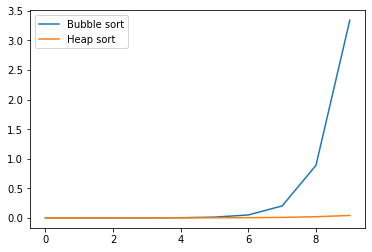

In [5]:
import matplotlib.pyplot as plt
plt.plot(time_bubble_sort, label="Bubble sort")
plt.plot(time_heap_sort, label="Heap sort")
plt.legend(loc="best")

## Search in Sorted Array

In [6]:
arr = [1, 2, 3, 4, 5]

item = 3

def sequential_search(arr, item):
    n = len(arr)
    for i in range(n):
        if arr[i] == item:
            return i
    return -1

sequential_search(arr, item)

2

In [7]:
def dichotomous_search(arr, p, r, item):
    if r >= p:
        q = int((p + r)//2)
        if arr[q] == item:
            return q
        elif arr[q] > item:
            return dichotomous_search(arr, p, q-1, item)
        else:
            return dichotomous_search(arr, q+1, r, item)
    else:
        return -1

dichotomous_search(arr, 0, len(arr)-1, item)

2

Dichotomous search is better for sorted arrays since it uses the method of divide and conquer. It takes O(lgn) time as compared to linear time O(n) taken by sequential search.

In [10]:
time_sequential_search = []
time_dichotomous_search = []

item = random.randint(0,10)

for l in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    n = 2 ** l
    t1 = time.time()
    sequential_search(np.random.randint(10,size=n), item)
    time_sequential_search.append(time.time() - t1)
    
    arr = np.random.randint(10,size=n)
    t2 = time.time()
    dichotomous_search(arr, 0, len(arr)-1, item)
    time_dichotomous_search.append(time.time() - t2)

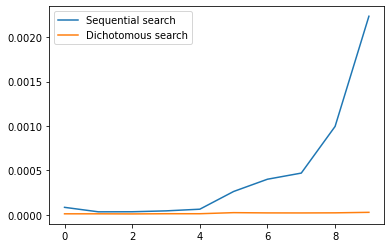

In [11]:
plt.plot(time_sequential_search, label="Sequential search")
plt.plot(time_dichotomous_search, label="Dichotomous search")
plt.legend(loc="best")